# Импорт библиотек

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools

### Отключим предупреждения Anaconda

In [2]:
warnings.simplefilter('ignore')

# Загрузим данные

In [3]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/y.pkl.gz', 'rb'))

# N-PLS1

## Выберем столбец у с которым будем работать

In [4]:
m=0

## Посчитаем Z

In [5]:
z=np.zeros([206,55])

In [6]:
for i in range(0,55):
    for j in range(0,206):
        zsum=0
        for k in range(0,35):
            zsum+=Xdata_numpy['X'][k,j,i]*Ydata.iloc[k,m]
        z[j,i]=zsum

In [7]:
z

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , 30.42741355, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.76362119, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.36079377, ...,  0.        ,
         0.        ,  0.        ]])

## Разложим Z на вектора W$^{J}_{f}$ и W$^{I}_{f}$

In [8]:
Wk, S, WI = np.linalg.svd(z)

In [9]:
WI.shape

(55, 55)

In [10]:
import matplotlib.pyplot as plt
plt.imshow(WI, aspect="auto")
plt.show();

<Figure size 640x480 with 1 Axes>

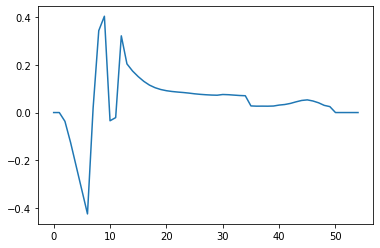

In [11]:
plt.plot(WI[3,:])
plt.show();

# Перейду к подбору нужной комбинации векторов для кронекеровского произведения для весов

In [ ]:
for i in range(0,206):
    for j in range(0,55):
        w_k=Wk[i,:]
        w_i=WI[j,:]
        t=[]
        for h in range(0,35):
            t+=[w_k.transpose*Xdata_numpy['X'][h,:,:]*w_i]
        t=np.array([t])
        T+=[t]
        T=np.array([T])

# Приближение к правильному алгоритму

In [104]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    Xdata_numpy["X"], Ydata.iloc[:,m], test_size=0.2857 
    )

In [110]:
X_train.shape[0]

25

In [133]:
x=X_train

In [134]:
y=y_train

In [135]:
y=np.array(y)

In [136]:
x=np.array(x)

In [138]:
Tt=[]
for f in range(0,55):
    z=z=np.zeros([x.shape[1],x.shape[2]])
    for i in range(0,x.shape[2]):
        for j in range(0,x.shape[1]):
            zsum=0
            for k in range(0,x.shape[0]):
                zsum= zsum+ x[k,j,i]*y[k]
            z[j,i]=zsum
    Wk, S, WI = np.linalg.svd(z)
    w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
    w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
    
    t=[]
    for h in range(0,x.shape[0]):
        t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
    t=np.array(t).reshape(x.shape[0],1)
    Tt+=[t]
    T=np.array(Tt).reshape(x.shape[0],f+1)
    bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
    
    for g in range(0,x.shape[0]):
        x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
    print(y[1])
    y=y-(np.dot(T,bf))

-2.5440464063319646e-07
9.573124638630788e-07
9.446016852888508e-07
9.890607157083663e-07
9.778188516865846e-07
9.671969415508681e-07
1.3353735736216738e-06
1.6424504740442071e-06
1.4370126492401654e-06
1.8005458838051853e-06
1.6221226898485967e-06
5.277095025088345e-07
4.455094686566443e-07
-4.2008852821905813e-07
1.1690154064986112e-08
-3.2196561859156374e-08
-6.692215807255225e-10
1.276934212976907e-08
3.3058161810733144e-09
-5.738416838184916e-09
-9.86797334407254e-09
1.2664655860282138e-10
6.793426100726998e-11
5.005565564849131e-12
2.4240199174077915e-11
-6.237173329573211e-11
-1.4073189354323987e-11
-1.2203756651335395e-12
-4.5125657016574474e-13
-8.924251482484278e-13
-1.2591794169915971e-13
1.187000619657713e-13
6.362039358149155e-14
-8.328555071879531e-15
-2.205872019840845e-12
-5.4763977852194214e-14
-8.56414397285156e-12
3.72969390128952e-12
3.4006062641999917e-12
-1.5273666247176202e-10
-1.1346105936147015e-09
1.998845015181033e-09
-2.6308685061156804e-09
2.317692203146000

In [54]:
print(y.shape)

()


In [44]:
y

<bound method NDFrame.copy of        Gominy       Tyr       Trp
0   45.446791  3.718645  1.658959
1   53.715968  1.519253  2.908843
2   39.837588  3.514326  1.093680
3   31.410666  4.107808  2.413380
4   42.444629  2.397802  2.822168
5   36.479939  1.771192  3.826668
6   36.112553  2.080763  0.700694
7   44.049334  3.959066  3.163625
8   35.354605  1.172333  2.195268
9   47.441840  3.046104  4.011521
10  47.577334  3.345482  1.008305
11  38.622683  2.530967  3.533570
12  44.546831  0.838763  4.215091
13  35.724431  4.261243  4.150726
14  54.640664  2.577719  3.679025
15  49.409746  1.336314  0.847238
16  26.197475  2.164723  4.313643
17  36.226228  3.546828  1.899125
18  43.272738  1.845509  1.326550
19  34.070473  3.942426  1.985984
20  34.193088  1.458561  3.409581
21  33.342049  3.152387  3.504425
22  41.039801  3.836094  3.841496
23  47.996257  2.959377  3.267010
24  42.147702  1.660952  0.743222
25  34.242464  0.978959  2.295310
26  36.909160  0.675008  2.593348
27  28.183879  3.2